In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from torchvision.transforms import functional as TF


In [2]:
from torchvision import transforms
from PIL import Image
image_path = './cat_fitting_2.png'
image = Image.open(image_path)

# 使用torchvision.transforms定义一个resize操作
transform = transforms.Compose([
    transforms.Resize((75, 60)),
    transforms.Grayscale(),
    transforms.ToTensor(),
])

# 应用resize操作到图片
resized_image = transform(image)

# 显示图片


In [3]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 500)
        self.fc2 = nn.Linear(500, 400)
        self.fc3 = nn.Linear(400, 300)
        self.fc4 = nn.Linear(300, 200)
        self.fc5 = nn.Linear(200, 200)
        self.fc6 = nn.Linear(200, 100)
        self.fc7 = nn.Linear(100, 1)  # 隐藏层到输出层
        # self._initialize_weights()

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = torch.tanh(self.fc4(x))
        x = torch.tanh(self.fc5(x))
        x = torch.tanh(self.fc6(x))
        x = self.fc7(x)
        
        return x
    
    def _initialize_weights(self) -> None:
        # print(self.initialization)
  
        for obj in self.modules():
            if isinstance(obj, (nn.Linear,nn.Conv2d)):
                nn.init.normal_(obj.weight.data, 0, 0.01)
                # nn.init.normal_(obj.weight, 0, 0.01)
                if obj.bias is not None:
                    nn.init.normal_(obj.bias.data, 0, 0.01)
                    # nn.init.constant_(obj.bias, 0)
        


In [4]:
resized_image.shape

torch.Size([1, 75, 60])

In [5]:
# 生成图片中每个像素的坐标
_, height, width = resized_image.shape
Y, X = torch.meshgrid(torch.arange(height)/224, torch.arange(0,width,2)/224, indexing='ij')
coords = torch.stack((Y.flatten(), X.flatten()), dim=1).float().cuda()

# 目标灰度值
resized_image_half = resized_image[:, :, ::2]
targets = resized_image_half.flatten()[:, None].cuda()


In [6]:
coords.shape, targets.shape

(torch.Size([2250, 2]), torch.Size([2250, 1]))

In [7]:
Y2, X2 = torch.meshgrid(torch.arange(height)/224, torch.arange(width)/224, indexing='ij')
coords2 = torch.stack((Y2.flatten(), X2.flatten()), dim=1).float().cuda()

In [8]:
model = SimpleNN().cuda()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00005)


In [9]:

# 训练轮次
epochs = 1000000

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(coords)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

    if epoch %5000==0:
        torch.save(model.state_dict(), f'./model_{epoch}.pth')
        plt.figure()
        plt.imshow(model(coords2).reshape(height, width).detach().cpu().numpy(), cmap='gray')
        plt.savefig(f'./pic/model_{epoch}.png')
        plt.close()


Epoch [0/1000000], Loss: 0.6031
Epoch [100/1000000], Loss: 0.0201
Epoch [200/1000000], Loss: 0.0195
Epoch [300/1000000], Loss: 0.0191
Epoch [400/1000000], Loss: 0.0190
Epoch [500/1000000], Loss: 0.0189
Epoch [600/1000000], Loss: 0.0189
Epoch [700/1000000], Loss: 0.0189
Epoch [800/1000000], Loss: 0.0189
Epoch [900/1000000], Loss: 0.0189
Epoch [1000/1000000], Loss: 0.0189
Epoch [1100/1000000], Loss: 0.0189
Epoch [1200/1000000], Loss: 0.0189
Epoch [1300/1000000], Loss: 0.0189
Epoch [1400/1000000], Loss: 0.0189
Epoch [1500/1000000], Loss: 0.0189
Epoch [1600/1000000], Loss: 0.0189
Epoch [1700/1000000], Loss: 0.0189
Epoch [1800/1000000], Loss: 0.0189
Epoch [1900/1000000], Loss: 0.0189
Epoch [2000/1000000], Loss: 0.0189
Epoch [2100/1000000], Loss: 0.0189
Epoch [2200/1000000], Loss: 0.0189
Epoch [2300/1000000], Loss: 0.0188
Epoch [2400/1000000], Loss: 0.0188
Epoch [2500/1000000], Loss: 0.0186
Epoch [2600/1000000], Loss: 0.0181
Epoch [2700/1000000], Loss: 0.0169
Epoch [2800/1000000], Loss: 0.01

In [10]:
import matplotlib.pyplot as plt
import numpy as np


def format_settings(
        wspace=0.25, 
        hspace=0.4, 
        left=0.12, 
        right=0.9, 
        bottom=0.15, 
        top=0.95,
        fs=12,
        show_dpi=80,
        save_dpi=300,
        lw=1.5,
        ms=5,
        axlw=1.5,
        major_tick_len=5,
        major_tick_width=1.5,
        major_tick_pad=5,
        minor_tick_len=0,
        minor_tick_width=0,
        minor_tick_pad=5,
        ):
    '''
        使用方法：
            fig = plt.figure(figsize=(12, 4), dpi=300)
            format_settings()
            grid = plt.GridSpec(2, 2)
            ax1 = fig.add_subplot(grid[0, 0]) # 左上角图
            ax2 = fig.add_subplot(grid[0, 1]) # 右上角图
            ax3 = fig.add_subplot(grid[:, 0]) # 底部空间合并一张图
        注意：
            以上文字和坐标轴粗细适用于figsize长度为12的情形，宽度可调。
            若要调整figsize长度，需要相应调整以上文字和坐标轴粗细。
    '''
    # 设置子图线宽
    plt.rcParams['lines.linewidth'] = lw
    
    # 子图点大小
    plt.rcParams['lines.markersize'] = ms
    
    # 子图间距与位置  w:左右 h:上下
    plt.subplots_adjust(wspace=wspace, hspace=hspace, left=left, right=right, bottom=bottom, top=top)

    # 字体大小
    plt.rcParams['font.size'] = fs
    plt.rcParams['axes.labelsize'] = fs
    plt.rcParams['axes.titlesize'] = fs
    plt.rcParams['xtick.labelsize'] =fs
    plt.rcParams['ytick.labelsize'] = fs
    plt.rcParams['legend.fontsize'] = fs
    # 子图坐标轴宽度
    plt.rcParams['axes.linewidth'] = axlw
    # 子图坐标轴可见性
    plt.rcParams['axes.spines.top'] = True
    plt.rcParams['axes.spines.right'] = True
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.bottom'] = True

    # 子图坐标轴刻度宽度
    plt.rcParams['xtick.major.width'] = major_tick_width
    plt.rcParams['ytick.major.width'] = major_tick_width
    plt.rcParams['xtick.minor.width'] = minor_tick_width
    plt.rcParams['ytick.minor.width'] = minor_tick_width
    # 子图坐标轴刻度长度
    plt.rcParams['xtick.major.size'] = major_tick_len
    plt.rcParams['ytick.major.size'] = major_tick_len
    plt.rcParams['xtick.minor.size'] = minor_tick_len
    plt.rcParams['ytick.minor.size'] = minor_tick_len
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.major.pad'] = major_tick_pad
    plt.rcParams['ytick.major.pad'] = major_tick_pad
    plt.rcParams['xtick.minor.pad'] = minor_tick_pad
    plt.rcParams['ytick.minor.pad'] = minor_tick_pad
    
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.top'] = False 
    plt.rcParams['ytick.right'] = False
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.minor.visible'] = False
    plt.rcParams['ytick.minor.visible'] = False
    # 子图坐标轴刻度标签位置
    plt.rcParams['legend.frameon'] = False
    # 子图坐标轴刻度标签位置
    plt.rcParams['figure.dpi'] = show_dpi
    # 子图坐标轴刻度标签位置
    plt.rcParams['savefig.dpi'] = save_dpi


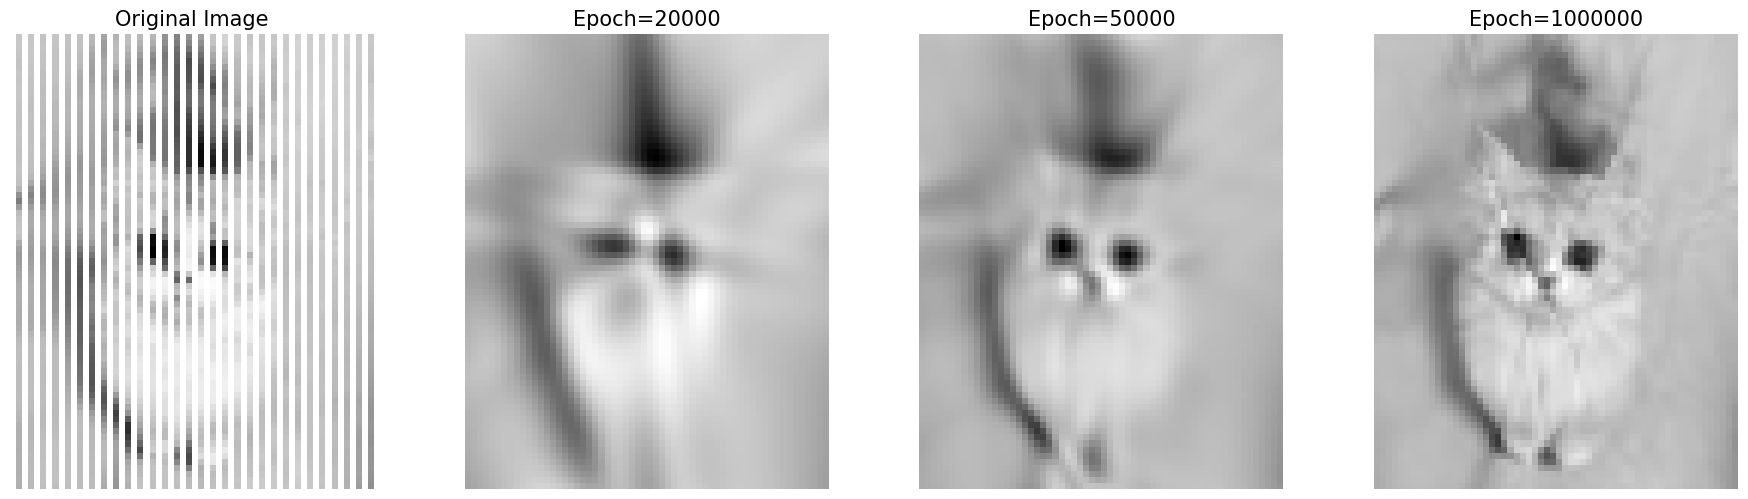

In [11]:



image_target = resized_image.cpu().numpy().reshape(height, width)
image_modified = image_target.copy()

image_modified[:, ::2] = 255 if image_modified.dtype == np.uint8 else 1.0

model_state = torch.load('./model_20000.pth')
model.load_state_dict(model_state)
with torch.no_grad():
    predicted1 = model(coords2).reshape(height, width).cpu().numpy()
model_state = torch.load('./model_50000.pth')
model.load_state_dict(model_state)
with torch.no_grad():
    predicted2 = model(coords2).reshape(height, width).cpu().numpy()
model_state = torch.load('./model_995000.pth')
model.load_state_dict(model_state)
with torch.no_grad():
    predicted3 = model(coords2).reshape(height, width).cpu().numpy()
plt.figure(figsize=(18, 5))
format_settings(left=0.02, right=0.98, bottom=0.04
        )
plt.subplot(1, 4, 1)
plt.title('Original Image', fontsize=15)
plt.imshow(image_modified, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.title('Epoch=20000', fontsize=15)
plt.imshow(predicted1, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.title('Epoch=50000', fontsize=15)
plt.imshow(predicted2, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.title('Epoch=1000000', fontsize=15)
plt.imshow(predicted3, cmap='gray')
plt.axis('off')

plt.savefig('/root/zhangzhongwang/book/cat_fitting/cat_fitting_large_ini.png', dpi=300)

# plt.show(dpi=300)
